<a href="https://colab.research.google.com/github/SergioGalindo27/Bigdata/blob/main/Proyecto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, Normalizer
from sklearn.impute import KNNImputer


In [71]:
data = pd.read_csv('datos_marketing.csv')

In [72]:
print(data.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       635         88              546              172   
1  08-03-2014        11          1                6                2   
2  21-08-2013       426         49              127              111   
3  10-02-2014        11          4               20               10   
4  19-01-2014       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumWebPurchases  NumCatalogPurchases  \
0                88    

In [73]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

In [74]:
data['edad'] = 2023 - data['Year_Birth']
data['edad'].describe()

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: edad, dtype: float64

In [75]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain,AcceptedCmps,edad
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,635,88,546,172,88,88,8,10,4,no,0,66
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,11,1,6,2,1,6,1,1,2,no,0,69
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,426,49,127,111,21,42,8,2,10,no,0,58
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,11,4,20,10,3,5,2,0,4,no,0,39
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,173,43,118,46,27,15,5,3,6,no,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,709,43,182,42,118,247,9,3,4,no,0,56
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,406,0,30,0,0,8,8,2,5,no,1,77
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,908,48,217,32,12,24,2,3,13,no,1,42
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,428,30,214,80,30,61,6,5,10,no,0,67


In [76]:
def function2(row):
  edad = row['edad']
  if edad <= 35:
    return 'adulto joven'
  elif edad <= 53:
    return 'adulto'
  else:
    return 'adulto mayor'

data['cat_edad'] = data.apply(function2, axis=1)
data['cat_edad'].describe()

count             2240
unique               3
top       adulto mayor
freq              1076
Name: cat_edad, dtype: object

In [77]:
data.drop(columns=['Year_Birth'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

In [78]:
data.describe()

,ID,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmps,edad
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,52247.251354,0.444196,0.506250,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,4.084821,2.662054,5.790179,0.297768,54.194196
std,3246.662198,25173.076661,0.538398,0.544538,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,2.778714,2.923101,3.250958,0.678381,11.984069
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000
25%,2828.250000,35303.000000,0.000000,0.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,2.000000,0.000000,3.000000,0.000000,46.000000
50%,5458.500000,51381.500000,0.000000,0.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,4.000000,2.000000,5.000000,0.000000,53.000000
75%,8427.750000,68522.000000,1.000000,1.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,6.000000,4.000000,8.000000,0.000000,64.000000
max,11191.000000,666666.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,27.000000,28.000000,13.000000,4.000000,130.000000


In [79]:
data['Income'].mean()

52247.25135379061

In [80]:
data['Income'].median()

51381.5

In [81]:
data['cat_edad'].unique()

array(['adulto mayor', 'adulto', 'adulto joven'], dtype=object)

In [82]:
data['cat_edad'].nunique()

3

In [83]:
def function3(row):
  hijos = row['Kidhome']
  if hijos <= 0:
    return 'Sin hijos'
  else:
    return 'Con hijos'

data['cat_hijos'] = data.apply(function3, axis=1)
data['cat_hijos'].describe()

count          2240
unique            2
top       Sin hijos
freq           1293
Name: cat_hijos, dtype: object

In [84]:
data

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain,AcceptedCmps,edad,cat_edad,cat_hijos
0,5524,Graduation,Single,58138.0,0,0,04-09-2012,635,88,546,...,88,88,8,10,4,no,0,66,adulto mayor,Sin hijos
1,2174,Graduation,Single,46344.0,1,1,08-03-2014,11,1,6,...,1,6,1,1,2,no,0,69,adulto mayor,Con hijos
2,4141,Graduation,Together,71613.0,0,0,21-08-2013,426,49,127,...,21,42,8,2,10,no,0,58,adulto mayor,Sin hijos
3,6182,Graduation,Together,26646.0,1,0,10-02-2014,11,4,20,...,3,5,2,0,4,no,0,39,adulto,Con hijos
4,5324,PhD,Married,58293.0,1,0,19-01-2014,173,43,118,...,27,15,5,3,6,no,0,42,adulto,Con hijos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0,1,13-06-2013,709,43,182,...,118,247,9,3,4,no,0,56,adulto mayor,Sin hijos
2236,4001,PhD,Together,64014.0,2,1,10-06-2014,406,0,30,...,0,8,8,2,5,no,1,77,adulto mayor,Con hijos
2237,7270,Graduation,Divorced,56981.0,0,0,25-01-2014,908,48,217,...,12,24,2,3,13,no,1,42,adulto,Sin hijos
2238,8235,Master,Together,69245.0,0,1,24-01-2014,428,30,214,...,30,61,6,5,10,no,0,67,adulto mayor,Sin hijos


In [85]:
q1 = data['Income'].quantile(.25)
q3 = data['Income'].quantile(.75)
IQR = q3 - q1
lim_sup = q3 + 1.5 * IQR
lim_inf = q1 - 1.5 * IQR

data = data[(data['Income'] >= lim_inf) & (data['Income'] <= lim_sup)]
data['Income'].describe()

count      2208.000000
mean      51633.638134
std       20713.376530
min        1730.000000
25%       35196.000000
50%       51301.000000
75%       68289.750000
max      113734.000000
Name: Income, dtype: float64

In [86]:
# categorización de variables

data['cat_income'] = pd.cut(data['Income'], 4, labels=['muy bajo', 'bajo', 'medio', 'alto'])

<ipython-input-86-5fa5a3bd51a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cat_income'] = pd.cut(data['Income'], 4, labels=['muy bajo', 'bajo', 'medio', 'alto'])


In [87]:
data[data["cat_income"]=="bajo"]

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain,AcceptedCmps,edad,cat_edad,cat_hijos,cat_income
1,2174,Graduation,Single,46344.0,1,1,08-03-2014,11,1,6,...,6,1,1,2,no,0,69,adulto mayor,Con hijos,bajo
6,965,Graduation,Divorced,55635.0,0,1,13-11-2012,235,65,164,...,27,7,3,7,no,0,52,adulto,Sin hijos,bajo
7,6177,PhD,Married,33454.0,1,0,08-05-2013,76,10,56,...,23,4,0,4,no,0,38,adulto,Con hijos,bajo
8,4855,PhD,Together,30351.0,1,0,06-06-2013,14,0,24,...,2,3,0,2,no,0,49,adulto,Con hijos,bajo
16,9736,Graduation,Married,41850.0,1,1,24-12-2012,53,5,19,...,4,3,0,3,no,0,43,adulto,Con hijos,bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,4286,PhD,Single,57642.0,0,1,09-01-2014,580,6,58,...,27,7,6,6,no,1,53,adulto,Sin hijos,bajo
2231,9817,Master,Single,44802.0,0,0,21-08-2012,853,10,143,...,20,9,4,12,no,0,53,adulto,Sin hijos,bajo
2234,8372,Graduation,Married,34421.0,1,0,01-07-2013,3,3,7,...,9,1,0,2,no,0,49,adulto,Con hijos,bajo
2237,7270,Graduation,Divorced,56981.0,0,0,25-01-2014,908,48,217,...,24,2,3,13,no,1,42,adulto,Sin hijos,bajo


<Axes: >

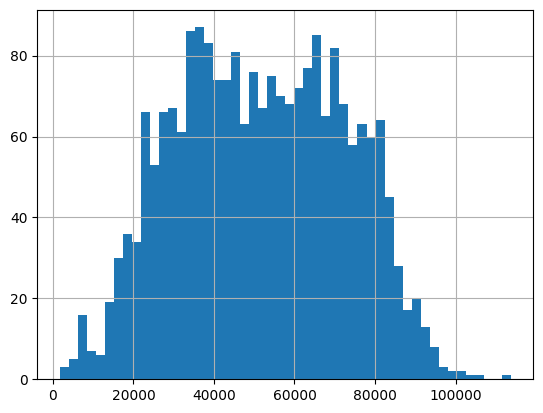

In [88]:
data['Income'].hist(bins=50)

In [89]:
# rename
data.rename(columns={'Income':'yearly_income'}, inplace=True)

<ipython-input-89-f270b851b414>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Income':'yearly_income'}, inplace=True)


In [90]:
data.replace({"Marital_Status":{"Together":"Married",}}, inplace=True)
data

<ipython-input-90-8a2397d95a44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace({"Marital_Status":{"Together":"Married",}}, inplace=True)


,ID,Education,Marital_Status,yearly_income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain,AcceptedCmps,edad,cat_edad,cat_hijos,cat_income
0,5524,Graduation,Single,58138.0,0,0,04-09-2012,635,88,546,...,88,8,10,4,no,0,66,adulto mayor,Sin hijos,medio
1,2174,Graduation,Single,46344.0,1,1,08-03-2014,11,1,6,...,6,1,1,2,no,0,69,adulto mayor,Con hijos,bajo
2,4141,Graduation,Married,71613.0,0,0,21-08-2013,426,49,127,...,42,8,2,10,no,0,58,adulto mayor,Sin hijos,medio
3,6182,Graduation,Married,26646.0,1,0,10-02-2014,11,4,20,...,5,2,0,4,no,0,39,adulto,Con hijos,muy bajo
4,5324,PhD,Married,58293.0,1,0,19-01-2014,173,43,118,...,15,5,3,6,no,0,42,adulto,Con hijos,medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0,1,13-06-2013,709,43,182,...,247,9,3,4,no,0,56,adulto mayor,Sin hijos,medio
2236,4001,PhD,Married,64014.0,2,1,10-06-2014,406,0,30,...,8,8,2,5,no,1,77,adulto mayor,Con hijos,medio
2237,7270,Graduation,Divorced,56981.0,0,0,25-01-2014,908,48,217,...,24,2,3,13,no,1,42,adulto,Sin hijos,bajo
2238,8235,Master,Married,69245.0,0,1,24-01-2014,428,30,214,...,61,6,5,10,no,0,67,adulto mayor,Sin hijos,medio


In [91]:
imputer = KNNImputer(n_neighbors=4)
data1 = imputer.fit_transform(data[['edad',
                                  'Kidhome',
                                  'Teenhome',
                                  'MntWines',
                                  'yearly_income',
                                  'MntMeatProducts',
                                  'MntGoldProds']])
data[['edad',
                                  'Kidhome',
                                  'Teenhome',
                                  'MntWines',
                                  'yearly_income',
                                  'MntMeatProducts',
                                  'MntGoldProds']] = data1
data

<ipython-input-91-197c28916201>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['edad',


,ID,Education,Marital_Status,yearly_income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain,AcceptedCmps,edad,cat_edad,cat_hijos,cat_income
0,5524,Graduation,Single,58138.0,0.0,0.0,04-09-2012,635.0,88,546.0,...,88.0,8,10,4,no,0,66.0,adulto mayor,Sin hijos,medio
1,2174,Graduation,Single,46344.0,1.0,1.0,08-03-2014,11.0,1,6.0,...,6.0,1,1,2,no,0,69.0,adulto mayor,Con hijos,bajo
2,4141,Graduation,Married,71613.0,0.0,0.0,21-08-2013,426.0,49,127.0,...,42.0,8,2,10,no,0,58.0,adulto mayor,Sin hijos,medio
3,6182,Graduation,Married,26646.0,1.0,0.0,10-02-2014,11.0,4,20.0,...,5.0,2,0,4,no,0,39.0,adulto,Con hijos,muy bajo
4,5324,PhD,Married,58293.0,1.0,0.0,19-01-2014,173.0,43,118.0,...,15.0,5,3,6,no,0,42.0,adulto,Con hijos,medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0.0,1.0,13-06-2013,709.0,43,182.0,...,247.0,9,3,4,no,0,56.0,adulto mayor,Sin hijos,medio
2236,4001,PhD,Married,64014.0,2.0,1.0,10-06-2014,406.0,0,30.0,...,8.0,8,2,5,no,1,77.0,adulto mayor,Con hijos,medio
2237,7270,Graduation,Divorced,56981.0,0.0,0.0,25-01-2014,908.0,48,217.0,...,24.0,2,3,13,no,1,42.0,adulto,Sin hijos,bajo
2238,8235,Master,Married,69245.0,0.0,1.0,24-01-2014,428.0,30,214.0,...,61.0,6,5,10,no,0,67.0,adulto mayor,Sin hijos,medio


<Axes: >

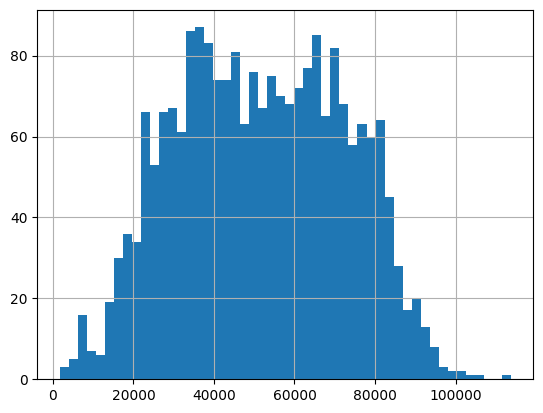

In [92]:
data['yearly_income'].hist(bins=50)

In [93]:
data.mean()

<ipython-input-93-abc01cf6c622>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


ID                      5586.900815
yearly_income          51633.638134
Kidhome                    0.442029
Teenhome                   0.506341
MntWines                 306.100996
MntFruits                 26.435236
MntMeatProducts          165.347826
MntFishProducts           37.758605
MntSweetProducts          27.122283
MntGoldProds              44.110960
NumWebPurchases            4.098279
NumCatalogPurchases        2.644928
NumStorePurchases          5.819293
AcceptedCmps               0.299366
edad                      54.192935
dtype: float64

<Axes: >

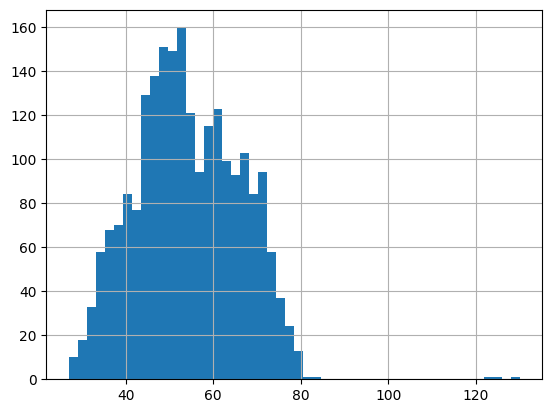

In [94]:
data['edad'].hist(bins=50)

In [95]:
data.drop_duplicates()

,ID,Education,Marital_Status,yearly_income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain,AcceptedCmps,edad,cat_edad,cat_hijos,cat_income
0,5524,Graduation,Single,58138.0,0.0,0.0,04-09-2012,635.0,88,546.0,...,88.0,8,10,4,no,0,66.0,adulto mayor,Sin hijos,medio
1,2174,Graduation,Single,46344.0,1.0,1.0,08-03-2014,11.0,1,6.0,...,6.0,1,1,2,no,0,69.0,adulto mayor,Con hijos,bajo
2,4141,Graduation,Married,71613.0,0.0,0.0,21-08-2013,426.0,49,127.0,...,42.0,8,2,10,no,0,58.0,adulto mayor,Sin hijos,medio
3,6182,Graduation,Married,26646.0,1.0,0.0,10-02-2014,11.0,4,20.0,...,5.0,2,0,4,no,0,39.0,adulto,Con hijos,muy bajo
4,5324,PhD,Married,58293.0,1.0,0.0,19-01-2014,173.0,43,118.0,...,15.0,5,3,6,no,0,42.0,adulto,Con hijos,medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0.0,1.0,13-06-2013,709.0,43,182.0,...,247.0,9,3,4,no,0,56.0,adulto mayor,Sin hijos,medio
2236,4001,PhD,Married,64014.0,2.0,1.0,10-06-2014,406.0,0,30.0,...,8.0,8,2,5,no,1,77.0,adulto mayor,Con hijos,medio
2237,7270,Graduation,Divorced,56981.0,0.0,0.0,25-01-2014,908.0,48,217.0,...,24.0,2,3,13,no,1,42.0,adulto,Sin hijos,bajo
2238,8235,Master,Married,69245.0,0.0,1.0,24-01-2014,428.0,30,214.0,...,61.0,6,5,10,no,0,67.0,adulto mayor,Sin hijos,medio


In [96]:
# groupby
data.groupby(['cat_edad', 'Marital_Status']).agg({'MntWines':'mean'})

MntWines
cat_edad     Marital_Status            
adulto       Alone            15.000000
             Divorced        275.680412
             Married         257.554585
             Single          229.765487
             Widow           204.615385
             YOLO            322.000000
adulto joven Absurd          471.000000
             Alone             5.000000
             Divorced          7.333333
             Married         276.983607
             Single          321.566038
adulto mayor Absurd          240.000000
             Alone           534.000000
             Divorced        370.992366
             Married         355.028148
             Single          355.453125
             Widow           400.666667

In [97]:
data.replace({"Marital_Status":{"YOLO":"Alone","Absurd":"Alone","Single":"Alone"}}, inplace=True)
data

<ipython-input-97-d51720aee973>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace({"Marital_Status":{"YOLO":"Alone","Absurd":"Alone","Single":"Alone"}}, inplace=True)


,ID,Education,Marital_Status,yearly_income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain,AcceptedCmps,edad,cat_edad,cat_hijos,cat_income
0,5524,Graduation,Alone,58138.0,0.0,0.0,04-09-2012,635.0,88,546.0,...,88.0,8,10,4,no,0,66.0,adulto mayor,Sin hijos,medio
1,2174,Graduation,Alone,46344.0,1.0,1.0,08-03-2014,11.0,1,6.0,...,6.0,1,1,2,no,0,69.0,adulto mayor,Con hijos,bajo
2,4141,Graduation,Married,71613.0,0.0,0.0,21-08-2013,426.0,49,127.0,...,42.0,8,2,10,no,0,58.0,adulto mayor,Sin hijos,medio
3,6182,Graduation,Married,26646.0,1.0,0.0,10-02-2014,11.0,4,20.0,...,5.0,2,0,4,no,0,39.0,adulto,Con hijos,muy bajo
4,5324,PhD,Married,58293.0,1.0,0.0,19-01-2014,173.0,43,118.0,...,15.0,5,3,6,no,0,42.0,adulto,Con hijos,medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0.0,1.0,13-06-2013,709.0,43,182.0,...,247.0,9,3,4,no,0,56.0,adulto mayor,Sin hijos,medio
2236,4001,PhD,Married,64014.0,2.0,1.0,10-06-2014,406.0,0,30.0,...,8.0,8,2,5,no,1,77.0,adulto mayor,Con hijos,medio
2237,7270,Graduation,Divorced,56981.0,0.0,0.0,25-01-2014,908.0,48,217.0,...,24.0,2,3,13,no,1,42.0,adulto,Sin hijos,bajo
2238,8235,Master,Married,69245.0,0.0,1.0,24-01-2014,428.0,30,214.0,...,61.0,6,5,10,no,0,67.0,adulto mayor,Sin hijos,medio


In [98]:
# groupby
data.groupby(['cat_edad', 'Marital_Status']).agg({'MntWines':'mean'})

MntWines
cat_edad     Marital_Status            
adulto       Alone           229.633188
             Divorced        275.680412
             Married         257.554585
             Widow           204.615385
adulto joven Alone           318.527273
             Divorced          7.333333
             Married         276.983607
adulto mayor Alone           355.778351
             Divorced        370.992366
             Married         355.028148
             Widow           400.666667

In [99]:
# groupby
data.groupby(['cat_income']).agg({'MntWines':'mean'})

,MntWines
cat_income,
muy bajo,13.366391
bajo,153.811040
medio,564.775485
alto,769.037975


In [100]:
data.describe()

,ID,yearly_income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmps,edad
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000
mean,5586.900815,51633.638134,0.442029,0.506341,306.100996,26.435236,165.347826,37.758605,27.122283,44.110960,4.098279,2.644928,5.819293,0.299366,54.192935
std,3249.110303,20713.376530,0.537063,0.544325,337.516270,39.842478,217.852649,54.813323,41.116999,51.852016,2.736724,2.798441,3.241866,0.680201,11.991913
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000
25%,2814.750000,35196.000000,0.000000,0.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,2.000000,0.000000,3.000000,0.000000,46.000000
50%,5458.500000,51301.000000,0.000000,0.000000,177.500000,8.000000,68.000000,12.000000,8.000000,25.000000,4.000000,2.000000,5.000000,0.000000,53.000000
75%,8418.500000,68289.750000,1.000000,1.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.250000,6.000000,4.000000,8.000000,0.000000,64.000000
max,11191.000000,113734.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,27.000000,28.000000,13.000000,4.000000,130.000000


In [101]:
q1 = data['edad'].quantile(.25)
q3 = data['edad'].quantile(.75)
IQR = q3 - q1
lim_sup = q3 + 1.5 * IQR
lim_inf = q1 - 1.5 * IQR

data = data[(data['edad'] >= lim_inf) & (data['edad'] <= lim_sup)]
data['edad'].describe()

count    2205.000000
mean       54.095692
std        11.705801
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max        83.000000
Name: edad, dtype: float64

In [102]:
data.describe()

,ID,yearly_income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmps,edad
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000
mean,5585.439456,51622.094785,0.442177,0.506576,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,4.100680,2.645351,5.823583,0.29932,54.095692
std,3247.546423,20713.063826,0.537132,0.544380,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,2.737424,2.798647,3.241796,0.68044,11.705801
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,27.000000
25%,2815.000000,35196.000000,0.000000,0.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,2.000000,0.000000,3.000000,0.00000,46.000000
50%,5455.000000,51287.000000,0.000000,0.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,4.000000,2.000000,5.000000,0.00000,53.000000
75%,8418.000000,68281.000000,1.000000,1.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,6.000000,4.000000,8.000000,0.00000,64.000000
max,11191.000000,113734.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,27.000000,28.000000,13.000000,4.00000,83.000000


In [103]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')



<ipython-input-103-e0e971881a69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')


In [104]:

data['year_customer'] = data['Dt_Customer'].dt.year


<ipython-input-104-eabe83d8ebd8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_customer'] = data['Dt_Customer'].dt.year


In [105]:
data

,ID,Education,Marital_Status,yearly_income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain,AcceptedCmps,edad,cat_edad,cat_hijos,cat_income,year_customer
0,5524,Graduation,Alone,58138.0,0.0,0.0,2012-09-04,635.0,88,546.0,...,8,10,4,no,0,66.0,adulto mayor,Sin hijos,medio,2012
1,2174,Graduation,Alone,46344.0,1.0,1.0,2014-03-08,11.0,1,6.0,...,1,1,2,no,0,69.0,adulto mayor,Con hijos,bajo,2014
2,4141,Graduation,Married,71613.0,0.0,0.0,2013-08-21,426.0,49,127.0,...,8,2,10,no,0,58.0,adulto mayor,Sin hijos,medio,2013
3,6182,Graduation,Married,26646.0,1.0,0.0,2014-02-10,11.0,4,20.0,...,2,0,4,no,0,39.0,adulto,Con hijos,muy bajo,2014
4,5324,PhD,Married,58293.0,1.0,0.0,2014-01-19,173.0,43,118.0,...,5,3,6,no,0,42.0,adulto,Con hijos,medio,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0.0,1.0,2013-06-13,709.0,43,182.0,...,9,3,4,no,0,56.0,adulto mayor,Sin hijos,medio,2013
2236,4001,PhD,Married,64014.0,2.0,1.0,2014-06-10,406.0,0,30.0,...,8,2,5,no,1,77.0,adulto mayor,Con hijos,medio,2014
2237,7270,Graduation,Divorced,56981.0,0.0,0.0,2014-01-25,908.0,48,217.0,...,2,3,13,no,1,42.0,adulto,Sin hijos,bajo,2014
2238,8235,Master,Married,69245.0,0.0,1.0,2014-01-24,428.0,30,214.0,...,6,5,10,no,0,67.0,adulto mayor,Sin hijos,medio,2014


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2205 non-null   int64         
 1   Education            2205 non-null   object        
 2   Marital_Status       2205 non-null   object        
 3   yearly_income        2205 non-null   float64       
 4   Kidhome              2205 non-null   float64       
 5   Teenhome             2205 non-null   float64       
 6   Dt_Customer          2205 non-null   datetime64[ns]
 7   MntWines             2205 non-null   float64       
 8   MntFruits            2205 non-null   int64         
 9   MntMeatProducts      2205 non-null   float64       
 10  MntFishProducts      2205 non-null   int64         
 11  MntSweetProducts     2205 non-null   int64         
 12  MntGoldProds         2205 non-null   float64       
 13  NumWebPurchases      2205 non-nul

In [107]:
data[data.select_dtypes("object").columns]=data.select_dtypes("object").astype("category")

<ipython-input-107-10083f8de460>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data.select_dtypes("object").columns]=data.select_dtypes("object").astype("category")


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2205 non-null   int64         
 1   Education            2205 non-null   category      
 2   Marital_Status       2205 non-null   category      
 3   yearly_income        2205 non-null   float64       
 4   Kidhome              2205 non-null   float64       
 5   Teenhome             2205 non-null   float64       
 6   Dt_Customer          2205 non-null   datetime64[ns]
 7   MntWines             2205 non-null   float64       
 8   MntFruits            2205 non-null   int64         
 9   MntMeatProducts      2205 non-null   float64       
 10  MntFishProducts      2205 non-null   int64         
 11  MntSweetProducts     2205 non-null   int64         
 12  MntGoldProds         2205 non-null   float64       
 13  NumWebPurchases      2205 non-nul

In [109]:
data.describe(exclude={"int64","float64"})

<ipython-input-109-d4007985af5d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(exclude={"int64","float64"})


,Education,Marital_Status,Dt_Customer,Complain,cat_edad,cat_hijos,cat_income
count,2205,2205,2205,2205,2205,2205,2205
unique,5,4,662,2,3,2,4
top,Graduation,Married,2012-08-31 00:00:00,no,adulto mayor,Sin hijos,bajo
freq,1113,1422,12,2185,1060,1276,941
first,NaN,NaN,2012-07-30 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,2014-06-29 00:00:00,NaN,NaN,NaN,NaN


In [110]:
data.describe()

,ID,yearly_income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmps,edad,year_customer
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000
mean,5585.439456,51622.094785,0.442177,0.506576,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,4.100680,2.645351,5.823583,0.29932,54.095692,2013.027664
std,3247.546423,20713.063826,0.537132,0.544380,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,2.737424,2.798647,3.241796,0.68044,11.705801,0.686039
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,27.000000,2012.000000
25%,2815.000000,35196.000000,0.000000,0.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,2.000000,0.000000,3.000000,0.00000,46.000000,2013.000000
50%,5455.000000,51287.000000,0.000000,0.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,4.000000,2.000000,5.000000,0.00000,53.000000,2013.000000
75%,8418.000000,68281.000000,1.000000,1.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,6.000000,4.000000,8.000000,0.00000,64.000000,2013.000000
max,11191.000000,113734.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,27.000000,28.000000,13.000000,4.00000,83.000000,2014.000000


<Axes: >

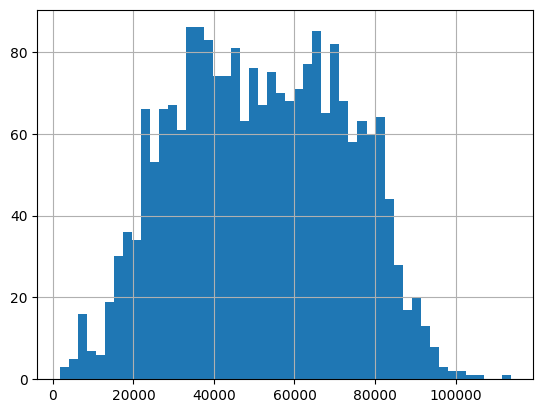

In [111]:
data['yearly_income'].hist(bins=50)


<Axes: >

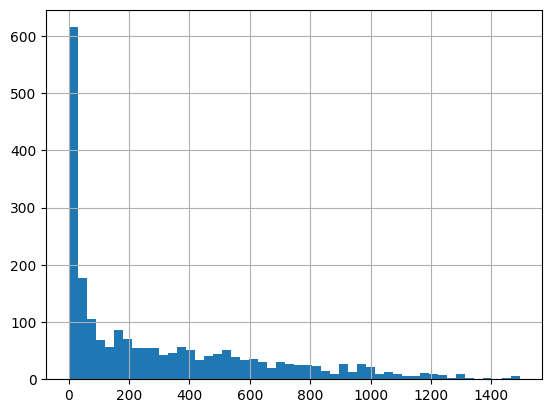

In [112]:
data['MntWines'].hist(bins=50)


<Axes: >

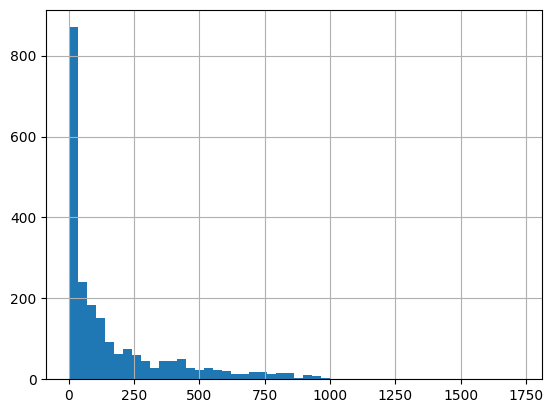

In [113]:
data['MntMeatProducts'].hist(bins=50)


<Axes: >

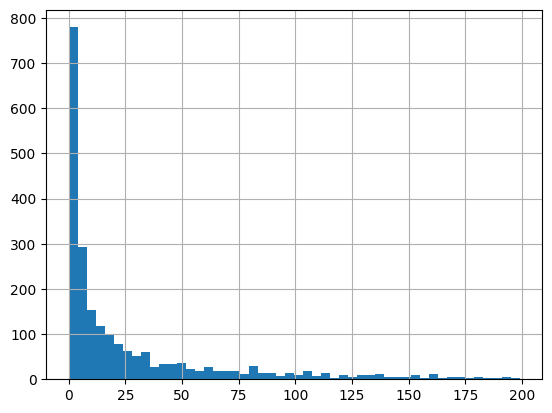

In [114]:
data['MntFruits'].hist(bins=50)


<Axes: >

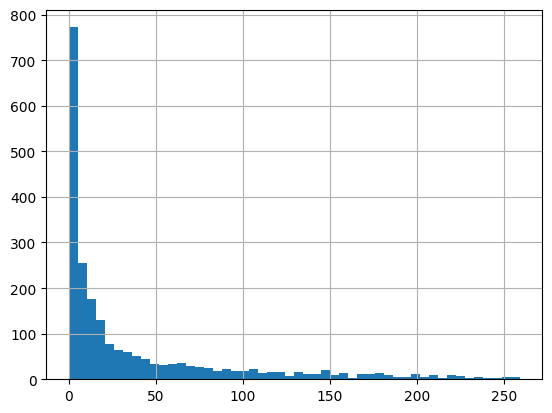

In [115]:
data['MntFishProducts'].hist(bins=50)


<Axes: >

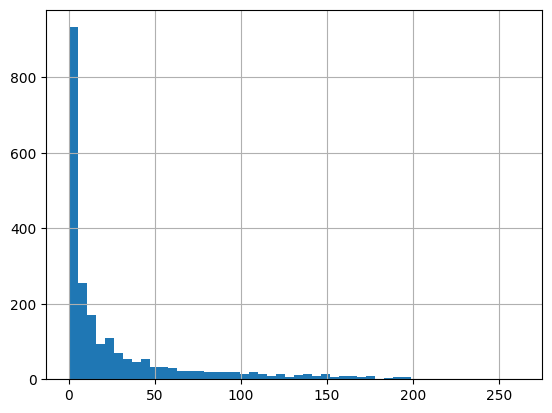

In [116]:
data['MntSweetProducts'].hist(bins=50)


<Axes: >

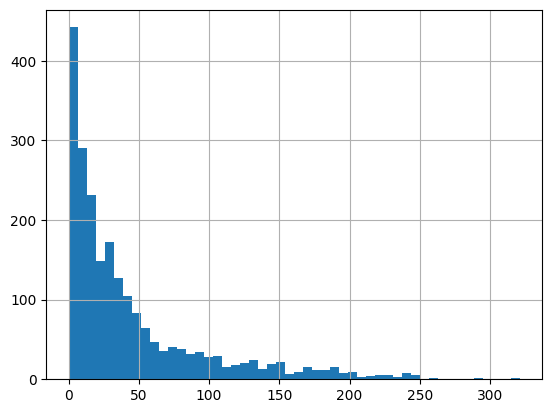

In [117]:
data['MntGoldProds'].hist(bins=50)


<Axes: >

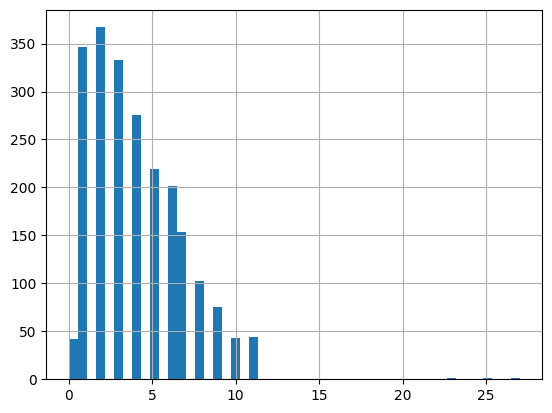

In [118]:
data['NumWebPurchases'].hist(bins=50)


<Axes: >

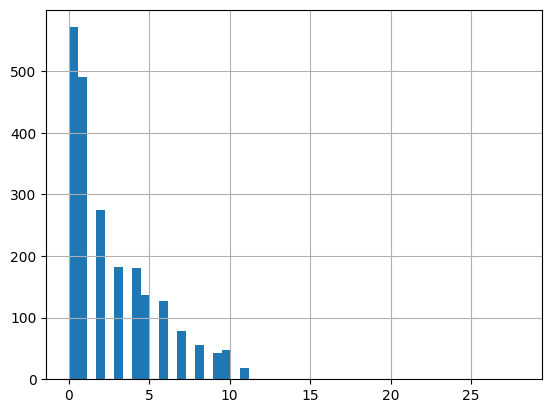

In [119]:
data['NumCatalogPurchases'].hist(bins=50)


<Axes: >

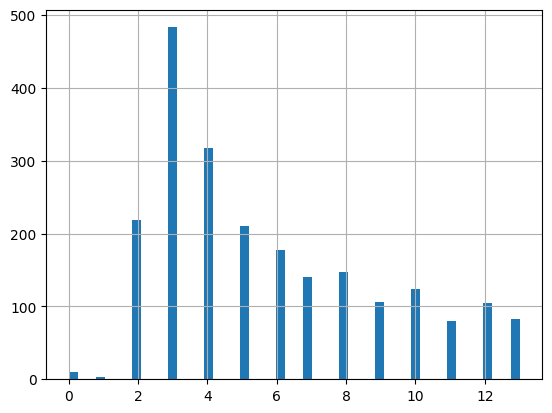

In [120]:
data['NumStorePurchases'].hist(bins=50)

<Axes: >

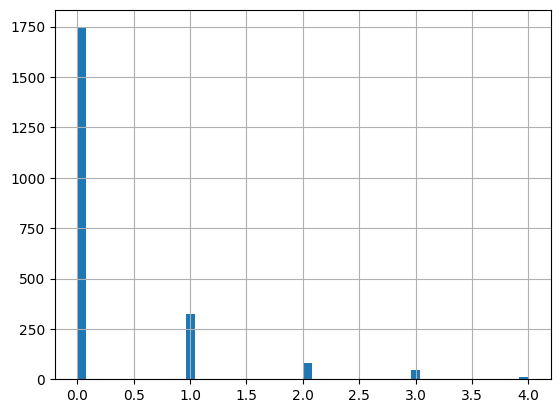

In [121]:
data['AcceptedCmps'].hist(bins=50)

<Axes: >

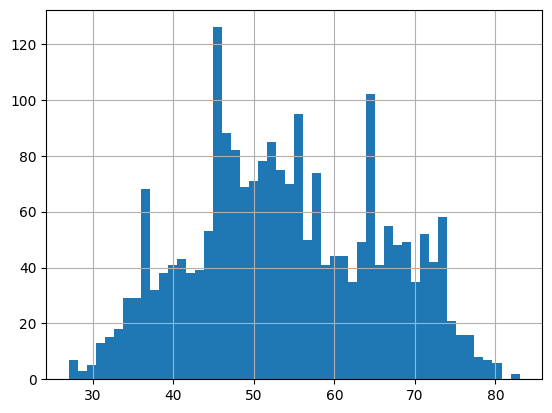

In [122]:
data['edad'].hist(bins=50)

In [123]:
education_counts = data['Education'].value_counts()
education_counts

Graduation    1113
PhD            476
Master         364
2n Cycle       198
Basic           54
Name: Education, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Graduation'),
  Text(1, 0, 'PhD'),
  Text(2, 0, 'Master'),
  Text(3, 0, '2n Cycle'),
  Text(4, 0, 'Basic')])

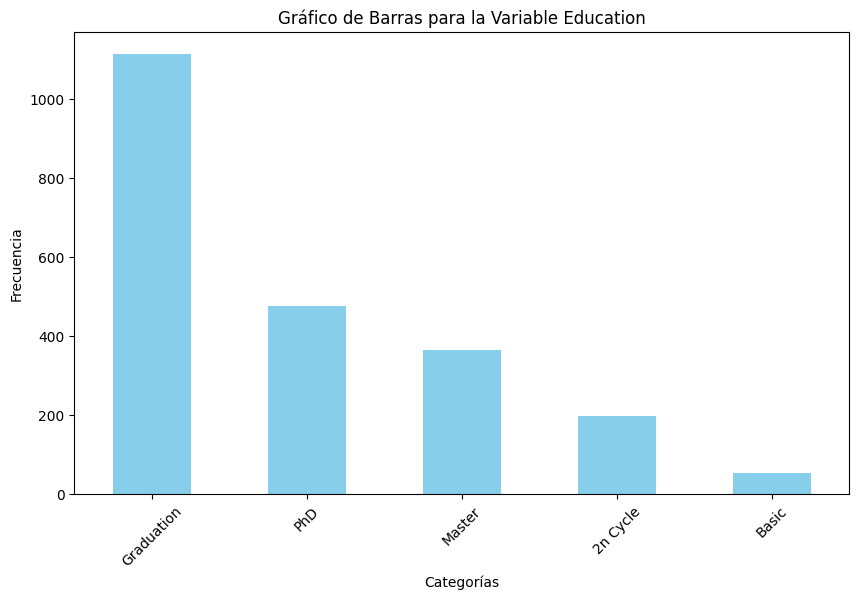

In [124]:
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
education_counts.plot(kind='bar', color='skyblue')  # Tipo de gráfico y color de las barras
plt.title('Gráfico de Barras para la Variable Education')  # Título del gráfico
plt.xlabel('Categorías')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.xticks(rotation=45)

In [125]:
Marital_counts = data['Marital_Status'].value_counts()
Marital_counts

Married     1422
Alone        477
Divorced     230
Widow         76
Name: Marital_Status, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Married'),
  Text(1, 0, 'Alone'),
  Text(2, 0, 'Divorced'),
  Text(3, 0, 'Widow')])

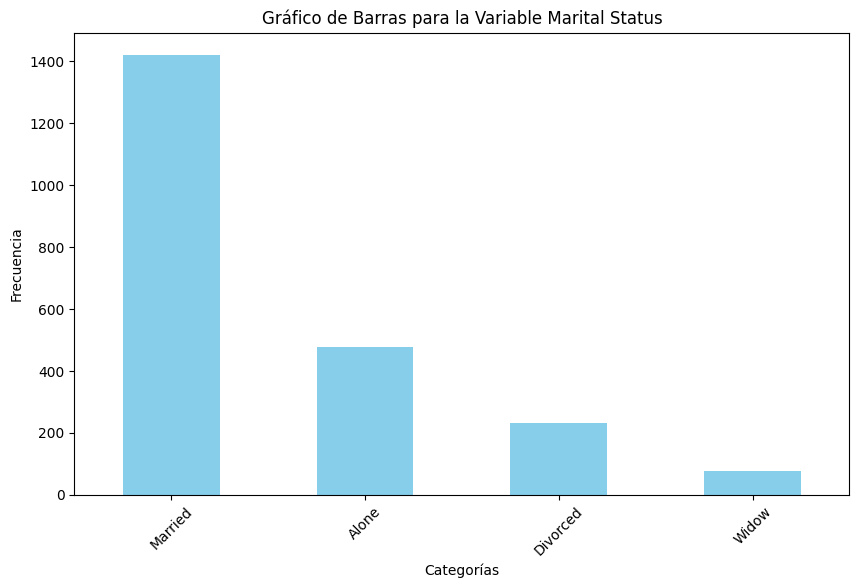

In [126]:
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
Marital_counts.plot(kind='bar', color='skyblue')  # Tipo de gráfico y color de las barras
plt.title('Gráfico de Barras para la Variable Marital Status')  # Título del gráfico
plt.xlabel('Categorías')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.xticks(rotation=45)

In [127]:

Complain_counts = data['Complain'].value_counts()
Complain_counts

no     2185
yes      20
Name: Complain, dtype: int64

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

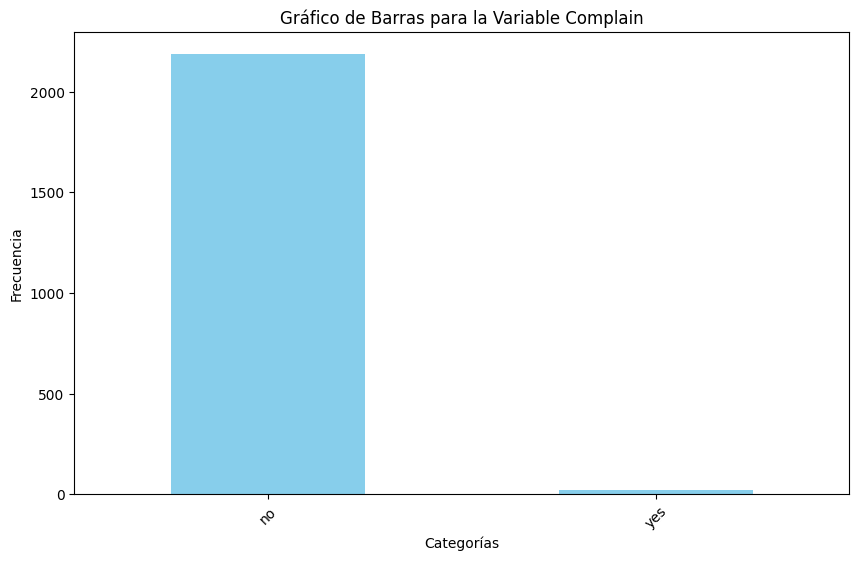

In [128]:
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
Complain_counts.plot(kind='bar', color='skyblue')  # Tipo de gráfico y color de las barras
plt.title('Gráfico de Barras para la Variable Complain')  # Título del gráfico
plt.xlabel('Categorías')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.xticks(rotation=45)

In [129]:

catedad_counts = data['cat_edad'].value_counts()
catedad_counts

adulto mayor    1060
adulto          1026
adulto joven     119
Name: cat_edad, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'adulto mayor'),
  Text(1, 0, 'adulto'),
  Text(2, 0, 'adulto joven')])

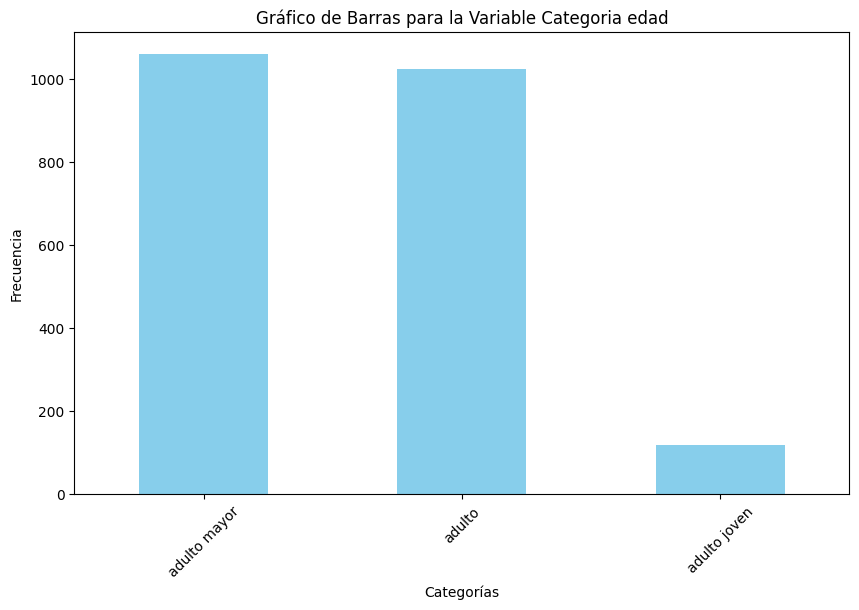

In [130]:
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
catedad_counts.plot(kind='bar', color='skyblue')  # Tipo de gráfico y color de las barras
plt.title('Gráfico de Barras para la Variable Categoria edad')  # Título del gráfico
plt.xlabel('Categorías')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.xticks(rotation=45)

In [131]:
catson_counts = data['cat_hijos'].value_counts()
catson_counts

Sin hijos    1276
Con hijos     929
Name: cat_hijos, dtype: int64

(array([0, 1]), [Text(0, 0, 'Sin hijos'), Text(1, 0, 'Con hijos')])

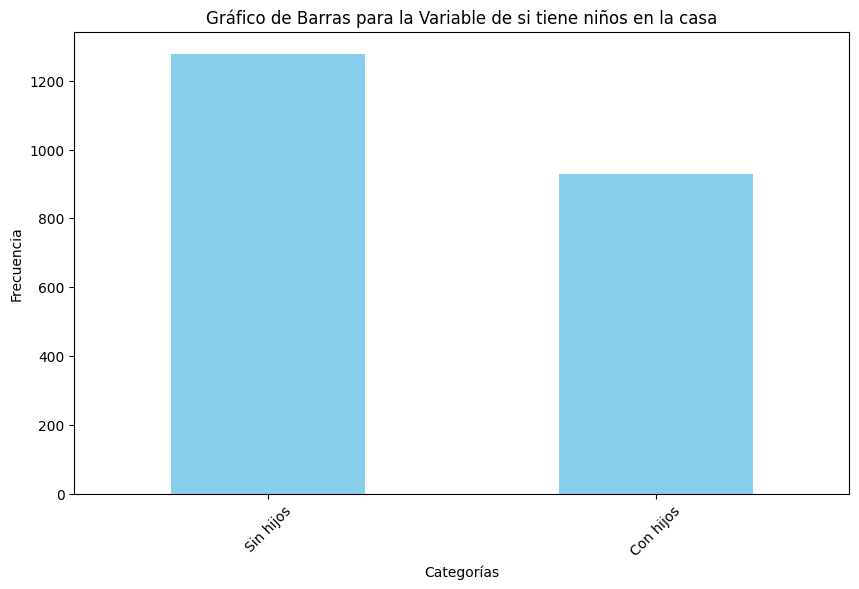

In [132]:
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
catson_counts.plot(kind='bar', color='skyblue')  # Tipo de gráfico y color de las barras
plt.title('Gráfico de Barras para la Variable de si tiene niños en la casa')  # Título del gráfico
plt.xlabel('Categorías')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.xticks(rotation=45)

In [133]:

catin_counts = data['cat_income'].value_counts()
catin_counts

bajo        941
medio       822
muy bajo    363
alto         79
Name: cat_income, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'bajo'),
  Text(1, 0, 'medio'),
  Text(2, 0, 'muy bajo'),
  Text(3, 0, 'alto')])

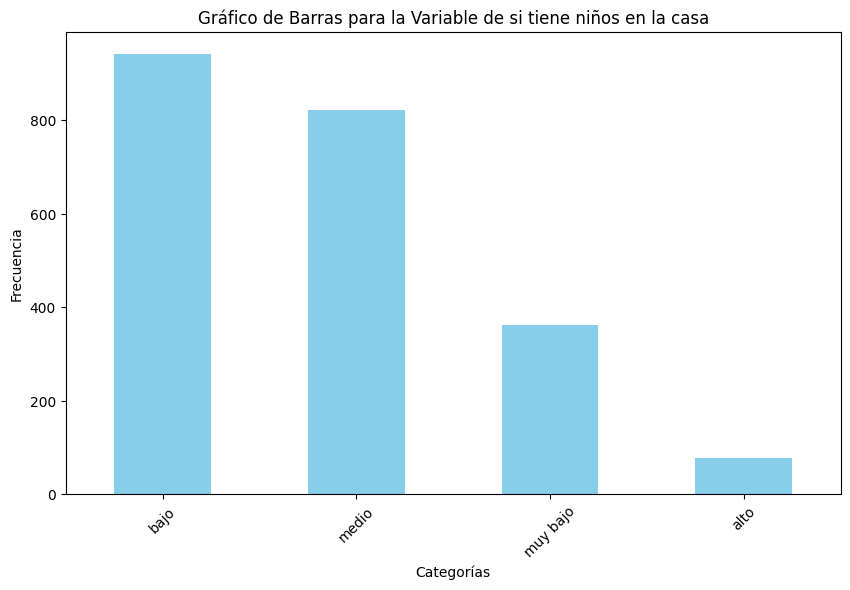

In [134]:
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
catin_counts.plot(kind='bar', color='skyblue')  # Tipo de gráfico y color de las barras
plt.title('Gráfico de Barras para la Variable de si tiene niños en la casa')  # Título del gráfico
plt.xlabel('Categorías')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.xticks(rotation=45)

<ipython-input-135-073f701be50e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

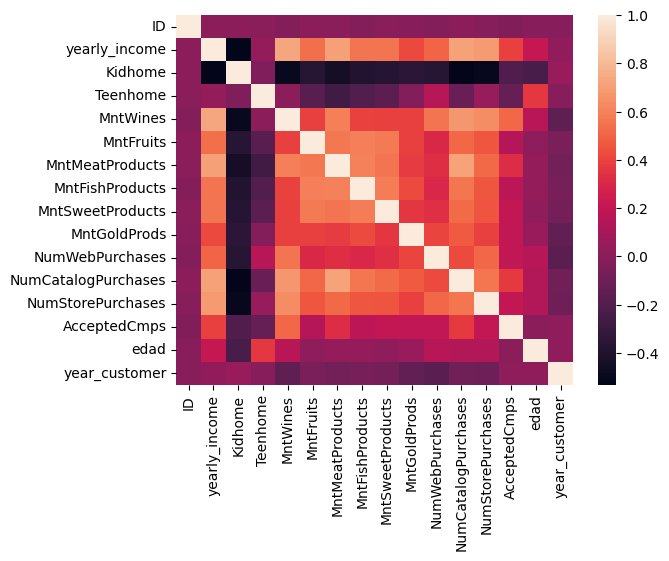

In [135]:
# análisis de correlación
sns.heatmap(data.corr())

In [136]:
data.mean()

<ipython-input-136-abc01cf6c622>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.mean()
<ipython-input-136-abc01cf6c622>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


ID                      5585.439456
yearly_income          51622.094785
Kidhome                    0.442177
Teenhome                   0.506576
MntWines                 306.164626
MntFruits                 26.403175
MntMeatProducts          165.312018
MntFishProducts           37.756463
MntSweetProducts          27.128345
MntGoldProds              44.057143
NumWebPurchases            4.100680
NumCatalogPurchases        2.645351
NumStorePurchases          5.823583
AcceptedCmps               0.299320
edad                      54.095692
year_customer           2013.027664
dtype: float64

In [137]:
data.std()

<ipython-input-137-a47ac8255c06>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.std()


ID                                     3247.546423
yearly_income                         20713.063826
Kidhome                                   0.537132
Teenhome                                   0.54438
Dt_Customer            202 days 13:31:39.061389212
MntWines                                337.493839
MntFruits                                39.784484
MntMeatProducts                         217.784507
MntFishProducts                          54.824635
MntSweetProducts                         41.130468
MntGoldProds                             51.736211
NumWebPurchases                           2.737424
NumCatalogPurchases                       2.798647
NumStorePurchases                         3.241796
AcceptedCmps                               0.68044
edad                                     11.705801
year_customer                             0.686039
dtype: object

In [139]:
data.groupby(['cat_edad', 'Marital_Status']).agg({'NumWebPurchases':'mean',"NumStorePurchases":"mean","NumCatalogPurchases":"mean"})

NumWebPurchases  NumStorePurchases  \
cat_edad     Marital_Status                                       
adulto       Alone                  3.454148           5.030568   
             Divorced               3.793814           5.608247   
             Married                3.867540           5.448326   
             Widow                  3.076923           5.846154   
adulto joven Alone                  3.418182           5.927273   
             Divorced               2.333333           3.000000   
             Married                3.311475           5.688525   
             Widow                       NaN                NaN   
adulto mayor Alone                  4.507772           6.378238   
             Divorced               4.792308           6.115385   
             Married                4.428783           6.247774   
             Widow                  4.936508           6.460317   

                             NumCatalogPurchases  
cat_edad     Marital_Status                       
adulto       Alone                      2.082969  
             Divorced                   2.391753  
             Married                    2.215429  
             Widow                      1.615385  
adulto joven Alone                      3.345455  
             Divorced                   0.000000  
             Married                    2.901639  
             Widow                           NaN  
adulto mayor Alone                      3.098446  
             Divorced                   2.976923  
             Married                    2.974777  
             Widow                      3.650794

In [140]:
data.groupby(['cat_edad', 'cat_hijos']).agg({'MntWines':'mean',"MntFruits":"mean","MntMeatProducts":"mean", "MntFishProducts":"mean", "MntSweetProducts":"mean", "MntGoldProds":"mean"})


MntWines  MntFruits  MntMeatProducts  \
cat_edad     cat_hijos                                           
adulto       Con hijos   98.164686   9.443124        50.837012   
             Sin hijos  460.201373  44.418764       272.439359   
adulto joven Con hijos   49.382979  10.212766        43.638298   
             Sin hijos  446.055556  51.680556       368.958333   
adulto mayor Con hijos  121.412969   6.109215        44.023891   
             Sin hijos  451.310300  35.534550       226.856584   

                        MntFishProducts  MntSweetProducts  MntGoldProds  
cat_edad     cat_hijos                                                   
adulto       Con hijos        13.585739          9.354839     22.711375  
             Sin hijos        63.032037         47.794050     61.755149  
adulto joven Con hijos        15.744681         11.000000     25.489362  
             Sin hijos        66.555556         48.027778     65.861111  
adulto mayor Con hijos         8.358362          6.092150     19.682594  
             Sin hijos        51.792699         36.065189     58.767927

In [141]:
data.groupby(['cat_edad', 'Marital_Status']).agg({'MntWines':'mean',"MntFruits":"mean","MntMeatProducts":"mean", "MntFishProducts":"mean", "MntSweetProducts":"mean", "MntGoldProds":"mean"})


MntWines  MntFruits  MntMeatProducts  \
cat_edad     Marital_Status                                           
adulto       Alone           229.633188  24.641921       151.000000   
             Divorced        275.680412  26.876289       154.195876   
             Married         257.554585  23.719068       143.347889   
             Widow           204.615385  32.923077        75.615385   
adulto joven Alone           318.527273  40.981818       292.600000   
             Divorced          7.333333   4.000000         9.000000   
             Married         276.983607  31.721311       204.852459   
             Widow                  NaN        NaN              NaN   
adulto mayor Alone           357.580311  26.580311       192.699482   
             Divorced        373.730769  28.746154       152.730769   
             Married         354.434718  26.979228       173.219585   
             Widow           400.666667  31.650794       207.968254   

                             MntFishProducts  MntSweetProducts  MntGoldProds  
cat_edad     Marital_Status                                                   
adulto       Alone                 34.480349         21.956332     39.628821  
             Divorced              27.072165         25.453608     45.371134  
             Married               35.649199         26.807860     38.197962  
             Widow                 41.076923         37.076923     49.692308  
adulto joven Alone                 54.818182         35.727273     54.945455  
             Divorced               2.666667          2.333333      5.333333  
             Married               41.131148         32.836066     47.573770  
             Widow                       NaN               NaN           NaN  
adulto mayor Alone                 40.341969         30.290155     45.963731  
             Divorced              42.215385         28.776923     48.430769  
             Married               38.043027         25.910979     47.590504  
             Widow                 51.730159         38.031746     57.126984

##Conlcusiones##

Preferencia de Compra por Canal:

Los adultos jóvenes, adultos y adultos mayores tienden a preferir realizar sus compras en la tienda física en lugar de utilizar el catálogo o la tienda en línea. Esto podría indicar una preferencia por la experiencia de compra en persona o la confianza en ver y tocar los productos antes de comprarlos.

Impacto de la Presencia de Niños:

Los adultos jóvenes, adultos y adultos mayores que tienen niños en el hogar tienden a gastar menos en comparación con aquellos que no tienen niños en casa. Esto podría deberse a las responsabilidades financieras adicionales asociadas con la crianza de niños.

Gasto en Licores:

Los adultos divorciados o solteros, al igual que los adultos mayores, tienden a gastar más en licores en comparación con otras categorías de estado civil. Esto podría reflejar diferentes patrones de consumo relacionados con el estado civil y la edad.
Gastos en Artículos de Lujo:

El análisis no indica diferencias significativas en los gastos en artículos de lujo en función del estado civil. Esto podría sugerir que, en general, el estado civil no influye en la preferencia por los productos de lujo.

##Recomendaciones##

Promoción de Compras en Línea y Catálogo:

A pesar de que los adultos jóvenes, adultos y adultos mayores tienden a preferir las compras en tiendas físicas, aún puedes promover las compras en línea y catálogo para diversificar las opciones de compra. Ofrece descuentos especiales o ventajas exclusivas para compras en línea o catálogo.

Programas de Lealtad para Padres:

Como los adultos con niños en casa tienden a gastar menos, podrías implementar programas de lealtad específicos para este grupo. Ofrece descuentos o recompensas adicionales para incentivar la fidelidad y las compras recurrentes.

Promoción de Artículos de Lujo:

A pesar de que no se encontraron diferencias significativas en los gastos en artículos de lujo según el estado civil, podrías destacar y promover tus productos de lujo como una opción atractiva para todos los clientes. Organiza eventos exclusivos o promociones especiales para estos productos.
Eventos Especiales para Adultos Divorciados o Solteros:

Dado que los adultos divorciados o solteros tienden a gastar más en licores, considera organizar eventos especiales, degustaciones o promociones relacionadas con licores para atraer a este grupo de clientes.